## Balanced Iterative Reducing and Clustering using Hierarchies - BIRCH

#### Meshack Nyiti, Hildebrand Department of Petroleum and Geosystems Engineering, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/meshacknyiti/)

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Lei Liu, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/leiliu96/)


### Executive Summary

Balanced Iterative Reducing and Clustering using Hierarchies addresses the challenge of clustering large datasets efficiently. It uses a hierarchical top down based on data distribution, starting with a root node in the clustering feature tree then recursively splitting clusters or splitting data as it moves down the hierarchy. BIRCH is a two-step clustering process where firstly assigns datapoints to existing clusters based on proximity then a more traditional algorithm refines the results to improve efficiency and clustering quality. Birch can reduce memory and computational demands while providing valuable insights into the data's structure. careful parameter tuning (branching factor and thresholds), data preprocessing, leveraging the hierarchical nature of BIRCH for exploration and evaluating clustering results. 

### Importing Packages

In [14]:
import pandas as pd
import numpy as np  # NumPy for numerical operations and array handling
import matplotlib.pyplot as plt  # Matplotlib for 2D plotting
from sklearn.datasets import make_blobs  # Scikit-learn for generating synthetic datasets
from sklearn.cluster import Birch  # Scikit-learn's Birch clustering algorithm
from sklearn.metrics import silhouette_score  # Silhouette score for clustering evaluation
from sklearn.preprocessing import StandardScaler  # StandardScaler for feature standardization
import ipywidgets as widgets  # Interactive HTML widgets for Jupyter
from ipywidgets import interact  # Interact function for creating interactive widgets
import seaborn as sns # Data visualization
from matplotlib.pyplot import cm # color maps
import matplotlib.pyplot as plt # Importing Matplotlib for additional customization
from matplotlib.colors import LinearSegmentedColormap # Importing specific functions from Matplotlib
from sklearn.cluster import AgglomerativeClustering # for Agglomerative clustering
from scipy.cluster.hierarchy import dendrogram, linkage # for dendrogram visualization
from time import time # to measure execution time
import plotly.express as px # interactive plotting
from sklearn.cluster import Birch, KMeans # Importing clustering algorithms
from sklearn import metrics # Evaluating Cluster Perfomance


This workflow uses some visualization function codes from GeostatsGuy github repository. The refered workflow for visualiztions can be viewed here:  [GeostatsGuy Advanced Clustering](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_advanced_clustering.ipynb)

### Functions
The provided code includes functions for hierarchical clustering and visualization. The 'visualize_hierarchical_tree' function generates synthetic data, performs hierarchical clustering, and visualizes the resulting dendrogram. The create_cmap function generates a color map using seaborn's palette. The arrange_plot function configures plot parameters for better visualization. The tune_birch_parameters function tunes the Birch clustering algorithm's parameters over a specified range, providing visualizations of clustering results and silhouette scores. These functions collectively offer tools for hierarchical clustering, color mapping, plot arrangement, and parameter tuning in a concise and modular manner.


In [15]:
# Function for hierarchical clustering and visualization
def visualize_hierarchical_tree(num_samples, linkage_method, distance_threshold):
    # Generate synthetic data
    data = df.sample(num_samples, random_state=73073)[['Norm_Por', 'Norm_AI']].values
    # Perform hierarchical clustering
    linkage_matrix = linkage(data, method=linkage_method)
    # Create a dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix, color_threshold=distance_threshold)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()
    
def create_cmap(n_colors,palette):
    a = {}
    palette = sns.color_palette(palette=palette, n_colors=n_colors, desat=0.8, as_cmap=False)
    for i in range(0,n_colors):
        color = palette[i:i+1][0]
        count = n_colors/n_colors+i
        a.update({count-1:color})                                                       # From GeostatsGuy workflows
    return a

# Plot Configurations for arranging title, limits, labels, fontsizes, and plot locations.   
def arrange_plot(title,xlabel,ylabel,xlim=None,ylim=None,size=None):
    if size == 'Small':
        plt.title(title);plt.xlabel(xlabel);plt.ylabel(ylabel)
    else:
        plt.title(title, fontsize=16);plt.xlabel(xlabel, fontsize=14);plt.ylabel(ylabel, fontsize=14)
    plt.xlim(xlim);plt.ylim(ylim);plt.grid(alpha=0.8)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2) # From GeostatsGuy workflows

# Function to measure time spent on clustering
def get_time_spent(df, algo, clusters):
    if algo == 'KMeans':
        t0 = time()
        kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)
        kmeans.fit(df)
        t1 = time()
        return t1 - t0

    elif algo == 'BIRCH':
        t0 = time()
        brc = Birch(branching_factor=50, n_clusters=clusters, threshold=1)
        brc.fit(df)
        t1 = time()
        return t1 - t0

# Function to calculate silhouette score
def get_silhouette_score(df, algo, clusters):
    if algo == 'KMeans':
        kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)
        kmeans.fit(df)
        labels = kmeans.labels_
        return metrics.silhouette_score(df, labels)

    elif algo == 'BIRCH':
        brc = Birch(branching_factor=50, n_clusters=clusters, threshold=1)
        brc.fit(df)
        labels = brc.labels_
        return metrics.silhouette_score(df, labels)

### Loading the Data

The dataset is imported from the github repository of Prof. Micheal Pyrcz, Data can be found in the link:

(
(https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/nonlinear_facies_v2.csv)

The following features are used in this workflow.

* **Porosity** - The ratio of the void volume to the ratio of the total volume of a porous medium. Its unit is percentage.
* **acoustic impedance** - is a measure of a rock's resistance to the passage of acoustic waves  ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^3$). 
* **Facies** - is a distincitive rock unit or set of characteristics with in a rock unit that reflects specific sedimentary or enviromental conditions during its formation (unitless).
* **Normalization** - is important because data uses euclidean distance to perform the clustering process, therefore Porosity and Acoustic Impedance Data normalized.

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/nonlinear_facies_v2.csv')

pormin = df['Por'].min(); pormax = df['Por'].max()
AImin = df['AI'].min(); AImax = df['AI'].max()

df['Norm_Por'] = (df['Por']-pormin)/(pormax - pormin)
df['Norm_AI'] = (df['AI']-AImin)/(AImax - AImin)

df.describe().transpose()

count        mean         std   min         25%         50%  \
Unnamed: 0  1800.0  205.055556  137.362381   0.0   89.750000  179.500000   
Por         1800.0   17.122778    4.778704   0.0   14.663434   17.674606   
AI          1800.0  625.522917  247.547997  10.0  518.076017  683.865824   
Facies      1800.0    1.666667    0.816723   1.0    1.000000    1.000000   
Norm_Por    1800.0    0.570759    0.159290   0.0    0.488781    0.589154   
Norm_AI     1800.0    0.517246    0.208024   0.0    0.426955    0.566274   

                   75%     max  
Unnamed: 0  316.000000   499.0  
Por          20.361860    30.0  
AI          783.315226  1200.0  
Facies        2.000000     3.0  
Norm_Por      0.678729     1.0  
Norm_AI       0.649845     1.0

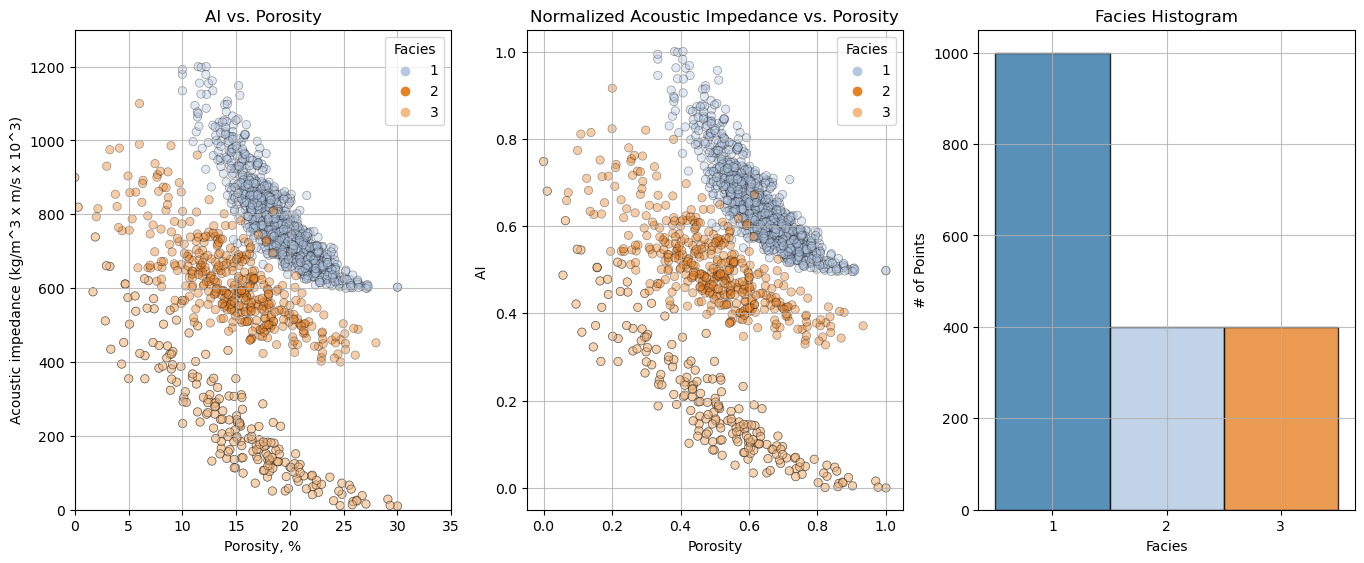

In [17]:
cmap = create_cmap(4,'tab20')

# Plotting the data
plt.subplot(131)
sns.scatterplot(x='Por', y='AI', hue='Facies', data=df, alpha=0.4, palette=cmap, edgecolor="black")
arrange_plot('AI vs. Porosity', 'Porosity, %', 'Acoustic impedance (kg/m^3 x m/s x 10^3)', [0, 35], [0, 1300], size='Small')
plt.subplot(132)
sns.scatterplot(x='Norm_Por', y='Norm_AI', hue='Facies', data=df, alpha=0.4, palette=cmap, edgecolor="black")
arrange_plot('Normalized Acoustic Impedance vs. Porosity', 'Porosity', 'AI ', xlim=None, ylim=None, size='Small')
plt.subplot(133)
N, bins, patches  = plt.hist(df['Facies'],alpha=0.8,edgecolor="black",bins=[0.5,1.5,2.5,3.5],range=[0.5,2.5])
for i in range(0,len(cmap)-1):
    patches[i].set_facecolor(cmap[i][:])
plt.xticks([1,2,3]);arrange_plot('Facies Histogram','Facies','# of Points',size='Small')

### Workflow Overview


**Step 1 - Visualization of Hierarchical Clustering Process** <br>
An interactive plot is used to illustrate various type of linkage that is used in hierarchical clustering process and their relation to Euclidean distance, Threshold and number of clusters. 

**Step 2 - Implementation of BIRCH** <br>
This step implements the BIRCH clustering process in the imported dataset and visualize clusters while performing hyperparameter tuning on threshold value.

**step 3 - Assessment of Birch compared to kmean clustering** <br>
This includes a plot to indicate time used during clustering process from small to large datasets.


### Step 1. Visualization of Hierarchical Clustering process
Experimentation with different cominations of parameters to gain insights into the hierarchical clustering patterns, linkage methods and distance threshold in influencing the formation of clusters

**1.	Number of Samples:**
•	This slider allows you to dynamically adjust the number of samples used in hierarchical clustering. You can choose any value between 5 and 1700 with a step size of 5.

**2.	Linkage Method:**
•	The "Linkage Method" dropdown lets you choose from various methods for linking clusters in the hierarchical clustering process. Options include:

•	'ward': Ward's method minimizes the variance within each cluster.

•	'complete': Complete linkage uses the maximum distance between all data points in two clusters.

•	'average': Average linkage calculates the average distance between all pairs of data points in two clusters.

•	'single': Single linkage uses the minimum distance between all data points in two clusters.

**3.	Distance Threshold:**
•	The "Distance Threshold" slider allows you to set the threshold for coloring clusters in the hierarchical clustering dendrogram. Adjust this threshold to observe how clusters are formed based on distance measures.

Based on my observation there are 3 clusters when we use 'ward' method and set a threshold distance of 5.5, which is the default distance used in this case to find the number of clusters.


In [18]:
# Set up interactive widgets
num_samples_slider = widgets.IntSlider(
    value=1700, min=5, max=1700, step=5,
    description='Number of Samples:')

linkage_method_dropdown = widgets.Dropdown(
    options=['ward', 'complete', 'average', 'single'], value='ward', description='Linkage Method:')

distance_threshold_slider = widgets.FloatSlider(
    value=5.50, min=0.1, max=20.0, step=0.1,
    description='Distance Threshold:')

# Create interactive plot
interact(visualize_hierarchical_tree, num_samples=num_samples_slider, linkage_method=linkage_method_dropdown, distance_threshold=distance_threshold_slider)


interactive(children=(IntSlider(value=1700, description='Number of Samples:', max=1700, min=5, step=5), Dropdo…

<function __main__.visualize_hierarchical_tree(num_samples, linkage_method, distance_threshold)>

### 2. Implementation of BIRCH 

**BIRCH**clustering algorithm, there are several hyperparameters that can be tuned to influence the clustering process. in this code we are performing hyperparameter tuning for the theshold value because the number of clusters was determined to be 3 from the dendrogram and the branching factor is set to 50. some basic definitions of the key birch parameters are listed as follows:

**1. The threshold** is a crucial hyperparameter in BIRCH. It determines the maximum diameter of a sub-cluster. Data points falling within this diameter are considered part of the same sub-cluster.
Points outside this threshold are used to create new sub-clusters or merge existing ones.


**2. The branching factor** determines the maximum number of CF (Clustering Feature) sub-clusters that a non-leaf node in the tree can have. 

**3. Number of Clusters (n_clusters):** BIRCH allows you to specify the desired number of clusters in advance. In this case we have prior knowledge of the number of clusters to be 3 therefore we use 3 clusters upfront.


**The Silhouette Score** is a metric used to measure the goodness of a clustering technique. It provides a way to assess the compactness and separation of the clusters in a set of data. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

The hyperparameter tuning of this method is based on silhouette score on each threshold value, the threshold values with highest silhouette score is selected as the best value of theshold in our case the threshold value that yields the lowest silhouette score is **0.1**. Threfore the first plot is our result for birch clustering 

In this case the clustering are not properly distributied because this method uses euclidean distances like kmeans, therefore other type of clustering method should be used after forming the clustering feature.

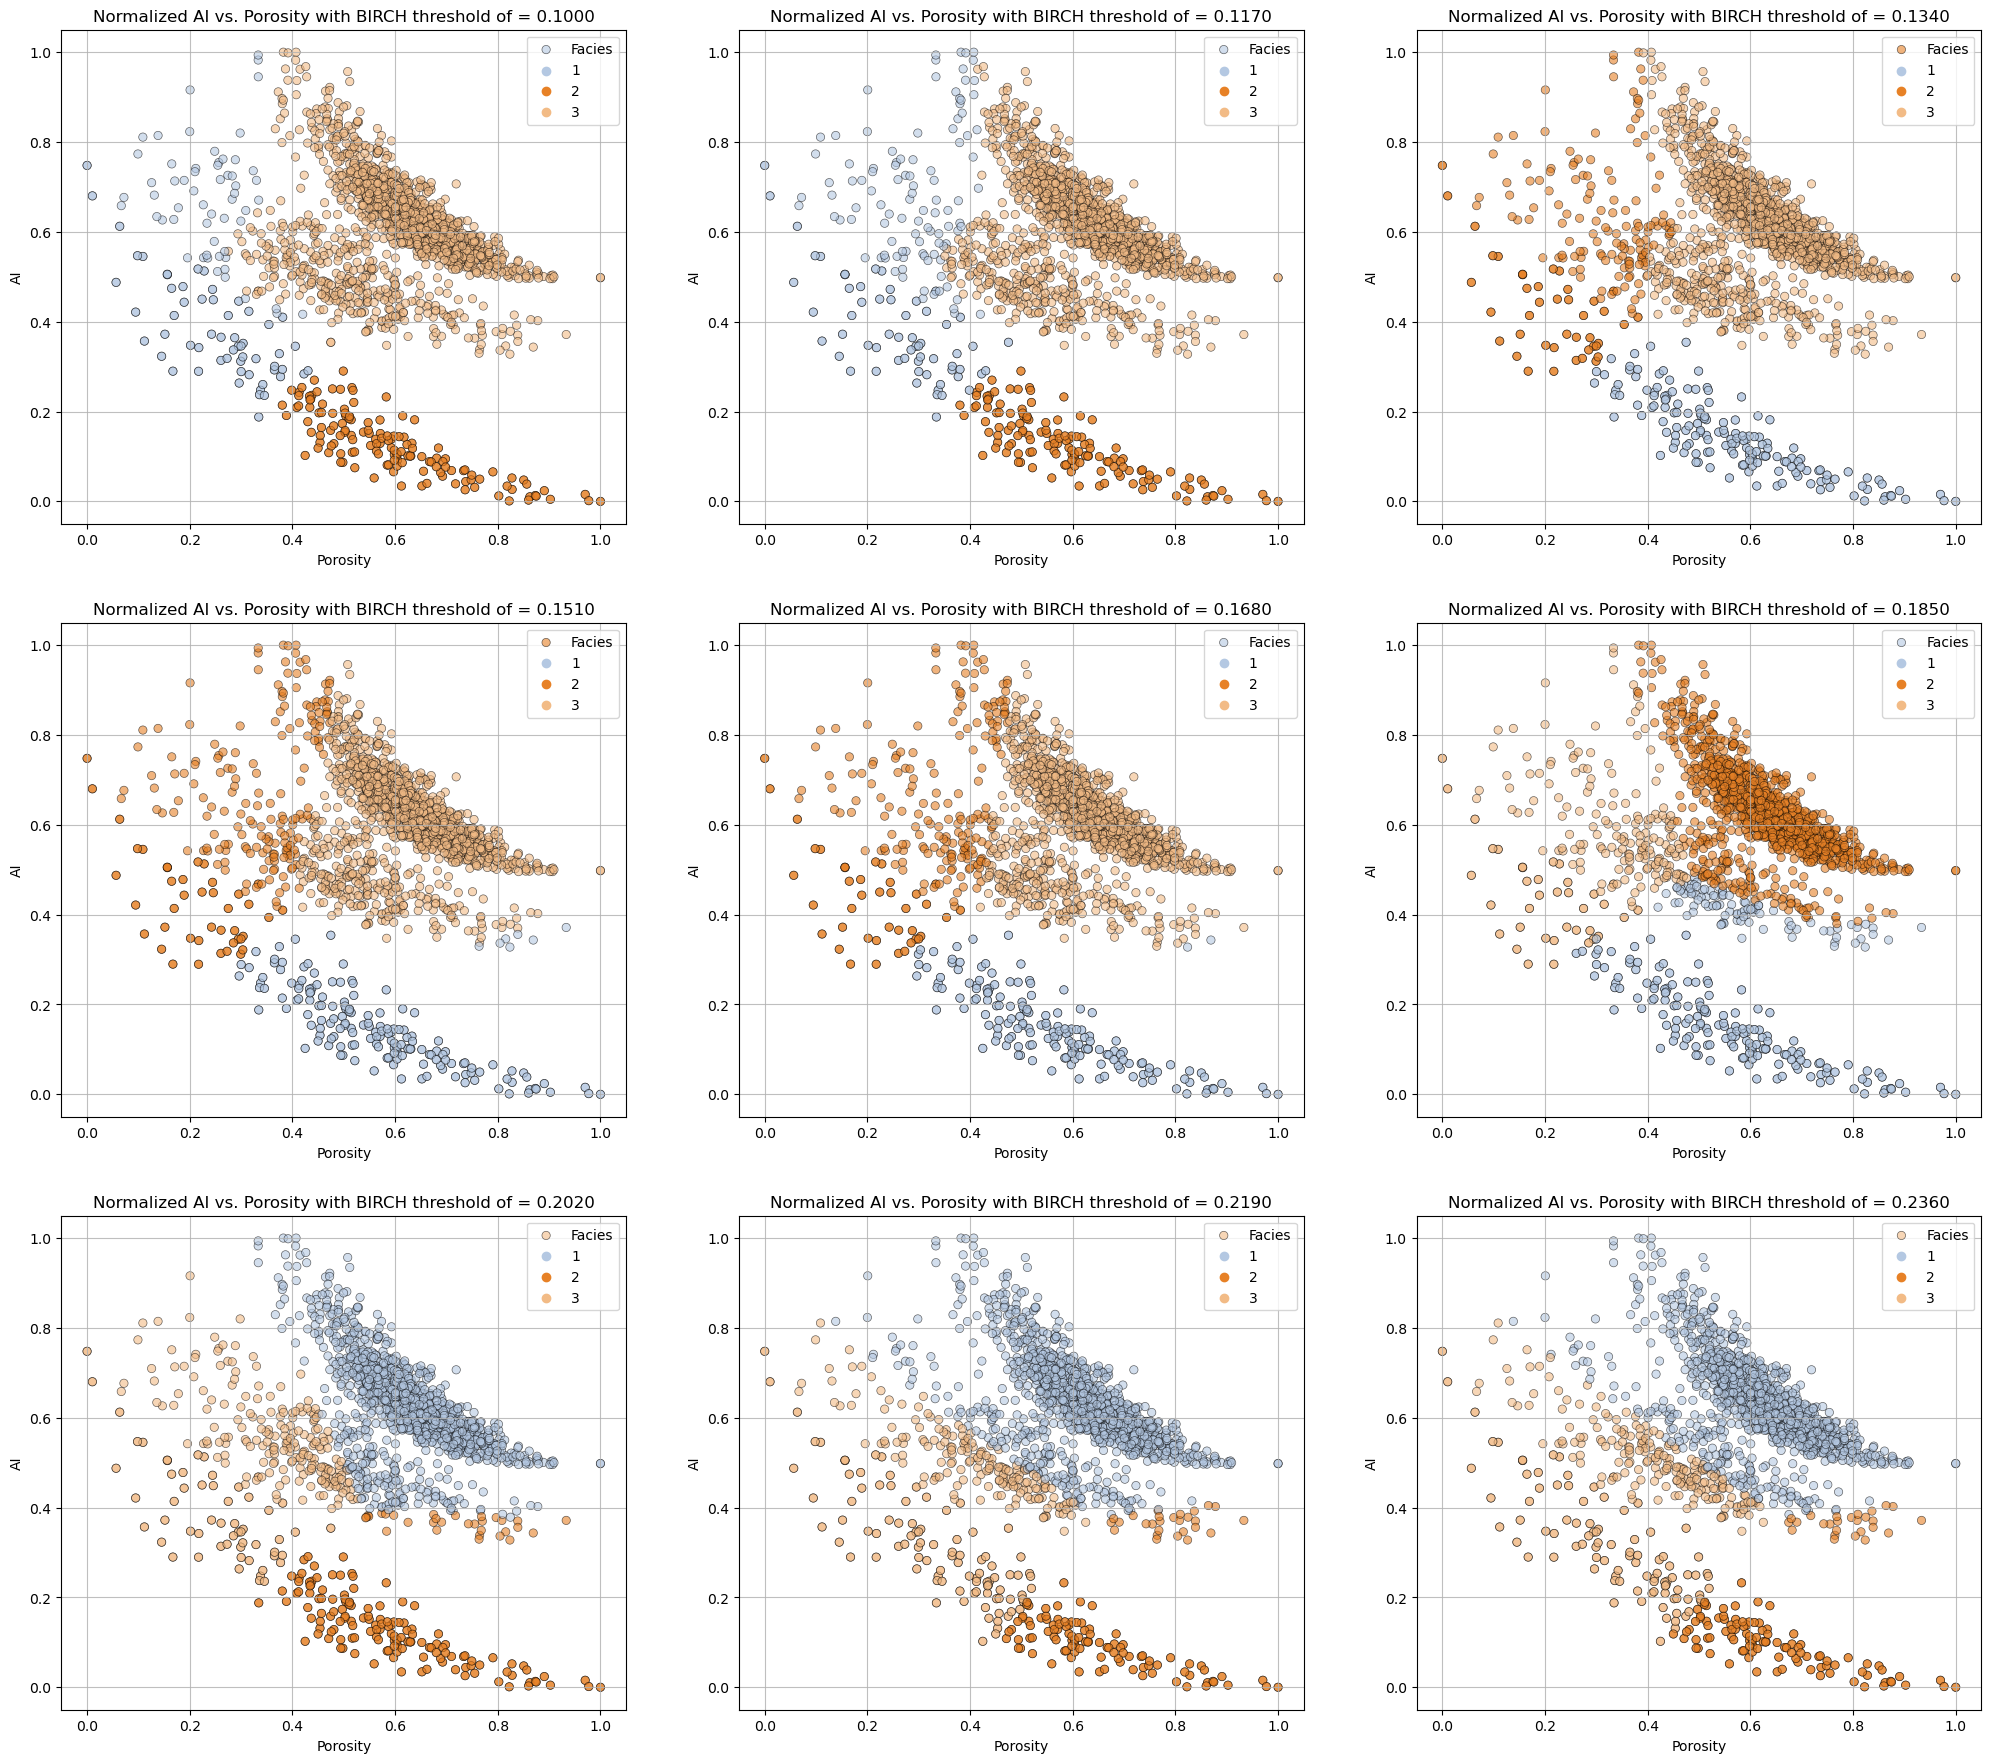

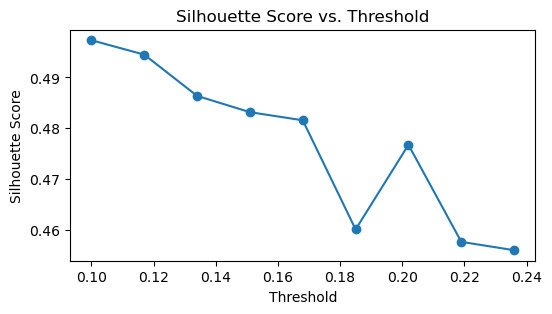

In [19]:
def tune_birch_parameters(data_scaled, min_threshold, max_threshold, increment):
    thresholds = np.arange(min_threshold, max_threshold, increment)
    silhouette_scores = []
    index=1
    for threshold in thresholds:
        # Create Birch clustering model
        birch = Birch(threshold=threshold, branching_factor=50, n_clusters=3)
        # Fit the model to the data
        birch.fit(data_scaled)
        # Predict cluster labels
        predicted_labels = birch.predict(data_scaled)
        # Calculate silhouette score
        silhouette_avg = silhouette_score(data_scaled, predicted_labels)
        silhouette_scores.append(silhouette_avg)
        # Visualize clustering results
        plt.subplot(3,3,index)
        n_colors=predicted_labels.shape[0]; cmap_new = create_cmap(n_colors,'tab20')
        sns.scatterplot(x=data_scaled[:,0], y=data_scaled[:,1], hue=predicted_labels+1,alpha=0.6,palette=cmap_new, edgecolor="black", label = 'Facies')
        arrange_plot(f'Normalized AI vs. Porosity with BIRCH threshold of = {threshold:.4f}','Porosity','AI',xlim=None,ylim=None,size='Small')
        index=index+1
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.50, wspace=0.2, hspace=0.2)
    plt.figure(figsize=(6, 3))
    plt.plot(thresholds, silhouette_scores, marker='o')
    plt.title('Silhouette Score vs. Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Silhouette Score')
# Standardize the data
scaler = StandardScaler()
data_scaled = df[['Norm_Por', 'Norm_AI']].values
# Hyperparameter tuning
min_threshold = 0.1
max_threshold = 0.25
increment = 0.017
tune_birch_parameters(data_scaled, min_threshold, max_threshold, increment)


### 3. BIRCH VS KMEANS (Execution Time Results)

The code performs a clustering analysis using **'KMeans'** and **'BIRCH'** algorithms on synthetic data with varying sample sizes. It measures and compares the execution time and silhouette score for each algorithm and visualizes the results in an interactive line plot. The plot helps analyze how these metrics change with an increasing number of samples.
The interactive plot was created with increasing the number of samples that were synthetically created to perform this assessment. **Note Plotly was used to create the plot** Therefore before running this codes its best to install the plotly library.

In [20]:
# Varying the number of samples
sample_sizes = [1000, 5000, 10000, 15000]
algorithm_names = ['KMeans', 'BIRCH']

# Create a DataFrame to store the results
results = []

for size in sample_sizes:
    X, clusters = make_blobs(n_samples=size, n_features=3, centers=6, cluster_std=1.5, random_state=0)
    row = {'Number of Samples': size}

    for algo in algorithm_names:
        execution_time = get_time_spent(X, algo, 6)
        silhouette_score = get_silhouette_score(X, algo, 6)

        row[f'{algo} Execution Time (s)'] = execution_time
        row[f'{algo} Silhouette Score'] = silhouette_score

    results.append(row)

# Create an interactive plot using plotly
df_results = pd.DataFrame(results)
fig = px.line(df_results, x='Number of Samples', y=df_results.columns[1:], title='Clustering Analysis with Increasing Samples',
              labels={'value': 'Metrics'}, line_shape='linear')
fig.update_layout(legend_title_text='Algorithms')
fig.show()

### Results

BIRCH is has generally indicated great efficiency in larger datasets with less execution time compared to kmeans clustering process however it is suitable when the clusters are spherical, BIRCH doesn't have good perfomance for non spherical clusters therefore DBSCAN could be more useful in such cases.

**From the results obtained and all the process that has been done on birch multiple conclusions can be provided:**

*BIRCH outperforms KMeans in terms of runtime, especially when dealing with large datasets featuring spherical multidimensional clusters. The hierarchical nature of BIRCH allows for more efficient clustering, making it well-suited for scenarios where execution time is a crucial factor.

*Utilizing an interactive plot for tree visualization with various linkage methods and threshold values provides a clear and intuitive means of determining the optimal number of clusters. This visualization approach enhances the interpretability of the clustering process, making it easier to identify distinct clusters in the data.

*Hyperparameter tuning, particularly for the threshold value, is a critical step in optimizing BIRCH's performance. Careful consideration of silhouette scores during tuning ensures the selection of a threshold that results in meaningful and well-defined clusters. This approach enhances the algorithm's ability to capture the inherent structure of the data.

*In cases where clusters exhibit non-spherical shapes, DBSCAN stands out as a more suitable alternative to BIRCH. The density-based nature of DBSCAN allows it to effectively identify clusters of varying shapes and sizes, providing superior performance when compared to BIRCH for datasets with non-spherical clusters.

### About Meshack Nyiti

*Bsc in Petroleum Engineering, University of Dodoma 2018*<br>
*Teaching Assistant Dar-es-Salaam Maritime Institute<br>
*Fulbright Scholar from Tanzania, <br>
*MSc Student at Hildebrand Department of Petroleum and Geosystems Engineering, University of Texas at Austin*<br>

**Research Interests:**
* Subsea Flow Assurance 
* Multiphase flow
* Production Engineering
* well bore flow assurance
* Condensate Banking
* Machine Learning

Feel free to contact me about this workflow, or my research topic of interest.

Sincerely,<br>
*Meshack Nyiti*

___________________

### Work Supervised by:

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)